# Training Machine Learning Intro Fall Detection Perceptron

### Overview

- [Artificial neurons – a brief glimpse into the early history of machine learning](#Artificial-neurons-a-brief-glimpse-into-the-early-history-of-machine-learning)
    - [The formal definition of an artificial neuron](#The-formal-definition-of-an-artificial-neuron)
    - [The perceptron learning rule](#The-perceptron-learning-rule)
- [Implementing a perceptron learning algorithm in Python](#Implementing-a-perceptron-learning-algorithm-in-Python)
    - [An object-oriented perceptron API](#An-object-oriented-perceptron-API)
    - [Training a perceptron model on the Iris dataset](#Training-a-perceptron-model-on-the-Iris-dataset)
- [Adaptive linear neurons and the convergence of learning](#Adaptive-linear-neurons-and-the-convergence-of-learning)
    - [Minimizing cost functions with gradient descent](#Minimizing-cost-functions-with-gradient-descent)
    - [Implementing an Adaptive Linear Neuron in Python](#Implementing-an-Adaptive-Linear-Neuron-in-Python)
    - [Improving gradient descent through feature scaling](#Improving-gradient-descent-through-feature-scaling)
    - [Large scale machine learning and stochastic gradient descent](#Large-scale-machine-learning-and-stochastic-gradient-descent)
- [Summary](#Summary)

## Setting Up a Virtual Environment and Jupyter Notebook in VS Code

### Open VS Code and project

### Step 1: Create a Virtual Environment
python3 -m venv myenv
else try 
python -m venv myenv

### Step 2: Activate the Virtual Environment
On Windows:
- myenv\Scripts\activate

On macOS/Linux:
- source myenv/bin/activate

### Step 3: Install Jupyter in the Virtual Environment
- pip install jupyter

### Step 4: Install the ipykernel Package
- pip install ipykernel
- python -m ipykernel install --user --name=myenv --display-name "MyEnv"

### Step 5: Install VS Code Extensions
- Install the Python and Jupyter extensions if you haven't already.
- Open your Jupyter Notebook file (.ipynb) in VS Code.

### Step 6: Select the Virtual Environment in Jupyter Notebook
- Once the notebook is open:
- Click on the kernel selector (in the top right corner of the notebook).
- Select another kernal and look for MyEnv
- Choose your virtual environment (MyEnv in this case).

Now, your notebook will run inside the virtual environment.

In [1]:
from IPython.display import Image # This class is used to display images in Jupyter Notebooks.

## Project Description
### Fall Detection with Perceptron

gpt 4-0 https://chatgpt.com/c/66f9645c-a768-8000-ab7a-dcb226e2ce17

#### Short Description:
This project uses a Perceptron model to detect falls based on incident descriptions. The text data is vectorized using TF-IDF and then classified as a fall or non-fall using the perceptron learning rule. The model can predict fall events based on incident text, offering a simple yet effective method for classification.

#### Perceptron Learning Rule:
The perceptron learning rule updates the model's weights incrementally based on the error in prediction. If the perceptron makes an incorrect prediction, the weights are adjusted by adding the product of the learning rate, the input vector, and the difference between the actual and predicted output. This process continues until the model converges to a solution or reaches the maximum number of iterations.

#### Diagram that illustrates the general concept of the perceptron:

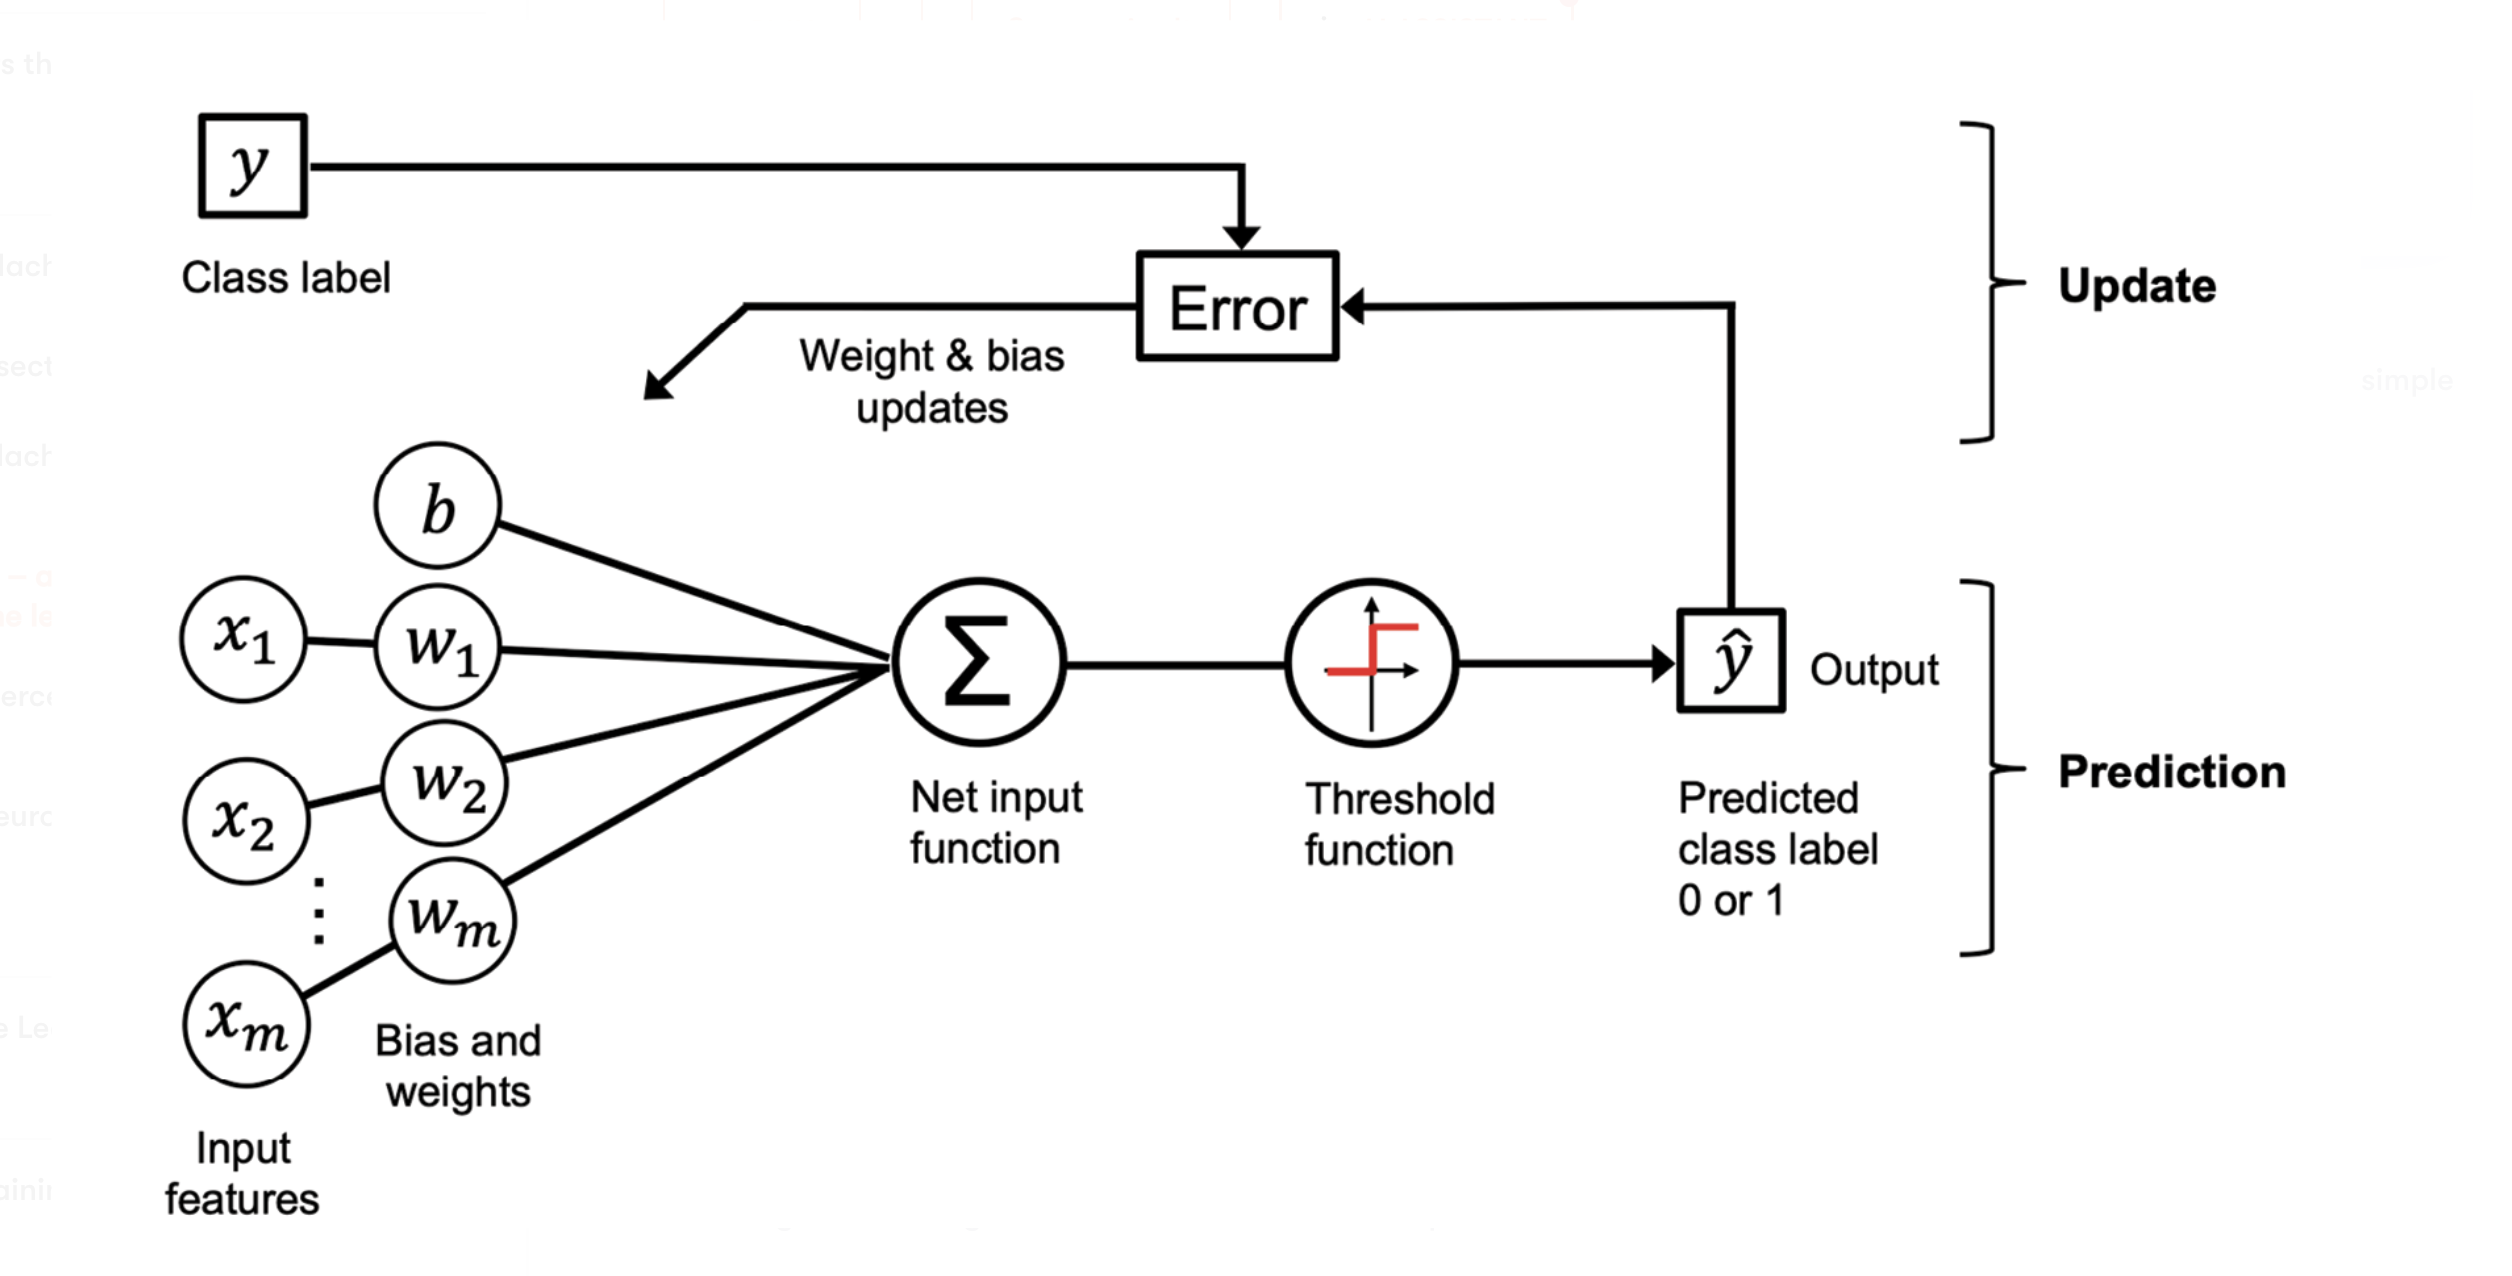

In [4]:
Image(filename='./images/perceptron_concept.png', width=500) # run to display image

## What is an AI?


- **AI** is the umbrella term for machines that act intelligently.
  - Carry out tasks that typically require human intelligence.
  - Includes understanding speech, recognizing images, making decisions, etc.
- **ML** (Machine Learning) is a method in AI where machines learn from data to improve performance.
  - Supervised learning: Detecting a fall from an incident note.
  - Unsupervised learning: Recommending Netflix shows based on history.
- **DL** (Deep Learning) is a more advanced type of ML using neural networks.
  - Think of it as layers of algorithms processing complex data like images.
  - Example applications:
    - Emotion detection from photos
    - Self-driving cars
    - Voice assistance

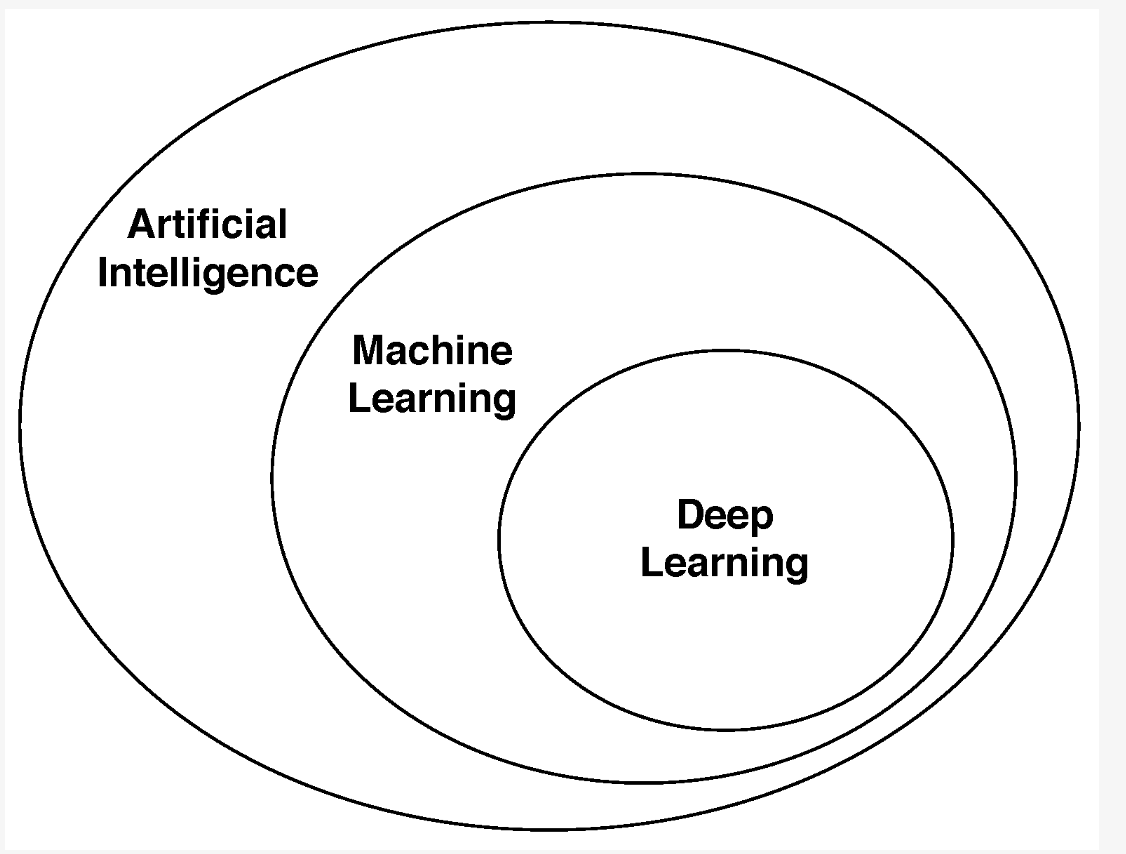

In [2]:
Image(filename='./images/overviewai.png', width=500) # run to display image

### Install requried packages

In [ ]:
!pip3 install jupyter
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install matplotlib 
!pip3 install seaborn
!pip3 install numpy

### Clean and Normalize The Data

#### Normalizing Text
- Converting text to lowercase: Ensures that "Fall" and "fall" are treated as the same word.
- Removing special characters or numbers (optional): Depending on the data, you might want to remove punctuation, numbers, or other irrelevant characters.
- Removing stopwords (optional): You might also want to remove common stopwords (like "and," "the," etc.) to reduce noise in the dataset.

In [ ]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

class DataCleanerAndNormalizer:
    def __init__(self, df):
        self.df = df
    
    # Step 1: Check unique identifiers and number of columns
    def check_data_summary(self):
        """Displays unique identifiers and column information."""
        print("\nData Summary:")
        print(f"Number of columns: {self.df.shape[1]}")
        print(f"Number of rows: {self.df.shape[0]}")
        print("\nUnique identifiers:")
        print(self.df.nunique())  # Displays the number of unique values per column
        print("\nColumn types:")
        print(self.df.dtypes)  # Show data types of each column

    # Step 2: Combine datasets (placeholder, as you can pass the combined dataset to the class)
    # i like this cause we combine the two datasets, i will include the datasets in the github project
    # if i can get more data from other databases i should, maybe i can get from atria, we remove the public identiifer 
    
    def combine_datasets(self, df2):
        """Combines two datasets and returns the merged dataframe."""
        self.df = self.df.merge(df2, how='inner')  # Assuming inner join, adjust based on your requirements
        print("\nDatasets combined successfully.")
        return self.df

    # Step 3: Define column types and show memory usage
    def optimize_column_types(self):
        """Defines column types and shows memory usage for optimization."""
        print("\nOptimizing column types for memory usage:")
        print(self.df.info(memory_usage='deep'))  # Displays memory usage before optimization

        # Example: Change object columns to category if applicable
        for col in self.df.select_dtypes(include='object').columns:
            num_unique_values = len(self.df[col].unique())
            num_total_values = len(self.df[col])
            if num_unique_values / num_total_values < 0.5:  # If unique values < 50% of total, use category
                self.df[col] = self.df[col].astype('category')
        
        print("\nMemory usage after optimization:")
        print(self.df.info(memory_usage='deep'))
        return self.df

    # Step 4: Data cleaning - handle missing values, normalization, and stopword removal
    def clean_and_normalize_data(self):
        """Cleans missing data and normalizes text by removing stopwords."""
        # Handle missing values
        missing_data_count = self.df.isnull().sum()
        print("\nCount of missing data in each column:")
        print(missing_data_count)
        self.df = self.df.dropna()  # Drop rows with missing data
        
        # Normalize text: convert to lowercase
        self.df['Description'] = self.df['Description'].apply(lambda x: x.lower() if isinstance(x, str) else x)
        
        # Remove stopwords
        stop = stopwords.words('english')
        self.df['Description'] = self.df['Description'].apply(
            lambda x: ' '.join([word for word in x.split() if word not in stop]) if isinstance(x, str) else x
        )
        
        print("\nData cleaned and normalized.")
        return self.df

    # Step 5: Show before and after stopword removal
    def compare_before_after_stopword_removal(self):
        """Compares text before and after stopword removal."""
        # Before removal
        before_stopword_removal = self.df['Description'].head(5)  # Take the first few rows to show before

        # After stopword removal (already removed in previous step, reapply to demonstrate)
        stop = stopwords.words('english')
        after_stopword_removal = before_stopword_removal.apply(
            lambda x: ' '.join([word for word in x.split() if word not in stop]) if isinstance(x, str) else x
        )

        print("\nBefore stopword removal:")
        print(before_stopword_removal)
        
        print("\nAfter stopword removal:")
        print(after_stopword_removal)
    
    # Step 6: Show most frequent words
    def get_most_frequent_words(self, top_n=10):
        """Finds the most frequent words in the corpus."""
        combined_text = ' '.join(self.df['Description'])
        combined_text = re.sub(r'\d+', '', combined_text)  # Remove numbers
        words = combined_text.split()
        
        # Remove stopwords
        stop = set(stopwords.words('english'))
        words = [word for word in words if word not in stop]
        
        # Count word frequencies
        word_counts = Counter(words)
        most_common_words = word_counts.most_common(top_n)
        
        print(f"\nMost common words in the dataset (Top {top_n}):")
        for word, count in most_common_words:
            print(f"{word}: {count}")

    # Step 7: TF-IDF feature extraction
    def get_tfidf_features(self, max_features=None):
        """Uses TF-IDF to extract unique features from the corpus."""
        vectorizer = TfidfVectorizer(max_features=max_features)
        vectorizer.fit(self.df['Description'])
        feature_names = vectorizer.get_feature_names_out()
        print("\nTF-IDF feature names:")
        print(feature_names)
        return feature_names

    # Optional: Overfitting and underfitting explanation
    def explain_overfitting_and_underfitting(self):
        """Explains overfitting and underfitting in model training."""
        print("\nOverfitting occurs when the model performs very well on training data but poorly on unseen data.")
        print("This is because the model learns specific patterns in the training set that don’t generalize well.")
        print("Underfitting happens when the model performs poorly on both training and test data,")
        print("likely because it’s too simple or lacks the right features.")



In [3]:
import nltk
nltk.download('stopwords')
import re # regular expression library
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

class DataCleanerAndNormalizer:
    def __init__(self, df):
        self.df = df
    
    def clean_data(self):
        # Get a count of rows with missing data
        missing_data_count = self.df.isnull().sum()  # the isnull().sum() will show the data type of the counts
        print("\nCount of missing data in each column:")
        print(missing_data_count)

        # Get the total number of rows with any missing data
        rows_with_missing_data = self.df.isnull().any(axis=1).sum()
        print(f"\nTotal number of rows with missing data: {rows_with_missing_data}")

        # Drop rows with any missing data
        df_cleaned = self.df.dropna()

        # Display the first few rows of the cleaned DataFrame to verify looks good high level overview
        print("\nFirst few rows of the cleaned dataset:")
        print(df_cleaned.head())

        return df_cleaned
    
    def normalize_data(self):
        # Normalize text: convert to lowercase and remove special characters
        self.df['Description'] = self.df['Description'].apply(lambda x: x.lower() if isinstance(x, str) else x)  # Convert to lowercase for qualatative data
       
        # self.df['Description'] = self.df['Description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))  # Remove special characters, optional step
        # Removing stopwords (optional): You might also want to remove common stopwords (like "and," "the," etc.) to reduce noise in the dataset.
        # For this, you can use the NLTK library.
  
        stop = stopwords.words('english')
        #self.df['Description'] = self.df['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]) if isinstance(x, str) else x)
        
        return self.df
    
    def get_most_frequent_words(self, corpus, top_n=10):
        combined_text = ' '.join(corpus)
        
        # Remove numbers
        combined_text = re.sub(r'\d+', '', combined_text)
        
        # Tokenize the text
        words = combined_text.split()
        
        # Remove stopwords
        stop = set(stopwords.words('english'))
        words = [word for word in words if word not in stop]
        
        # Count word frequencies
        word_counts = Counter(words)
        
        # Get the most common words
        most_common_words = word_counts.most_common(top_n)
        
        # Return only the words
        return [word for word, count in most_common_words]
    
    def get_number_of_words_feature_names(self, corpus, max_features=None):
        vectorizer = TfidfVectorizer(max_features=max_features)
        vectorizer.fit(corpus)
        feature_names = vectorizer.get_feature_names_out()
        print("Unique words in the corpus:", feature_names)
        
        return len(feature_names), feature_names

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/squeebit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Main Script


Count of missing data in each column:
Description    2
isFallFlg      0
dtype: int64

Total number of rows with missing data: 2

First few rows of the cleaned dataset:
                                         Description  isFallFlg
0                    Testing an incident submission.          1
1                                               test          0
2           Melanie fell from her bed this morning.           1
3  Pam was found on the floor of her unit; reside...          1
4                                              Test3          1


/var/folders/74/_jf5jntd0m73y8b26bl9bz780000gn/T/ipykernel_11076/3553120068.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['Description'] = self.df['Description'].apply(lambda x: x.lower() if isinstance(x, str) else x)  # Convert to lowercase for qualatative data


Unique words in the corpus: ['00' '000' '0000' ... 'zygoma' 'zygomatic' 'zyrtec']
Number of unique words in the corpus: (17139, array(['00', '000', '0000', ..., 'zygoma', 'zygomatic', 'zyrtec'],
      dtype=object))
Most frequent words: ['resident', 'floor', 'stated', 'staff', 'called', 'notified', 'found', 'room', '.', 'pain']
None


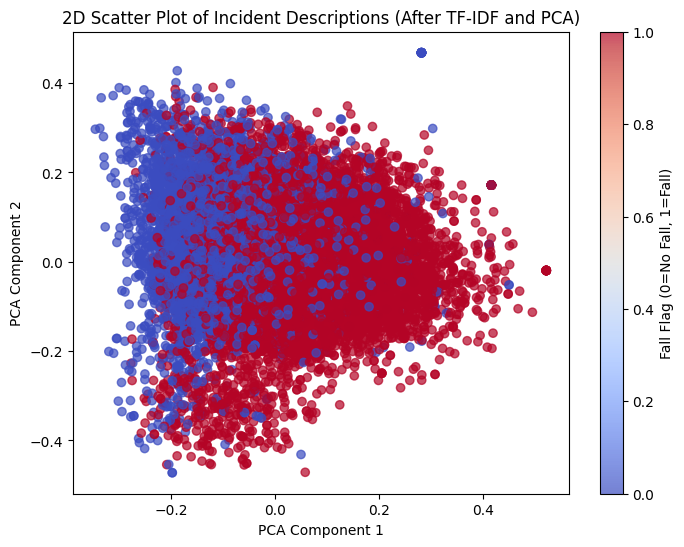

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75      1090
           1       0.91      0.82      0.86      2304

    accuracy                           0.82      3394
   macro avg       0.80      0.83      0.81      3394
weighted avg       0.84      0.82      0.83      3394



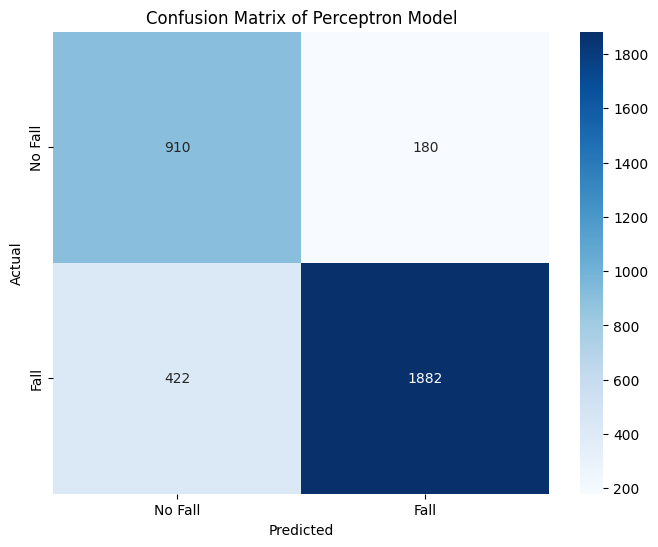

Prediction for 'This is a fall': [1]
Prediction for 'This is not a fall': [1]
Prediction for 'sky': [0]
Prediction for 'fall': [1]
Prediction for 'I flew to the mall': [0]
Prediction for 'I slipped in mud': [1]
Prediction for 'she fell but not really this is a test': [1]
Prediction for 'I walked to the store': [0]
Prediction for 'The weather is nice today': [0]


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


# Load the dataset
fall_data = pd.read_csv("data/fall_data_v1.csv")

# Clean the dataset
data_clearner_normalizer = DataCleanerAndNormalizer(fall_data)
df_cleaned = data_clearner_normalizer.clean_data()  # Returns the cleaned DataFrame
data_clearner_normalizer.df = df_cleaned  # Update the DataFrame for normalization

# Call the normalize_data method to normalize the dataset
df_normalized = data_clearner_normalizer.normalize_data()

df_normalized.to_csv("data/fall_data_v2.csv", index=False)

# # Check if the DataFrame was successfully after data cleaning
# print(f"\nDataset after data cleaning: {df_cleaned.shape[0]} rows, {df_cleaned.shape[1]} columns")

# # Check if the DataFrame was successfully after data normalization
# print(f"\nDataset after data normalization: {df_normalized.shape[0]} rows, {df_normalized.shape[1]} columns")

# Get the number of unique words in the corpus
corpus = df_cleaned['Description']  # Use the cleaned data
num_words = data_clearner_normalizer.get_number_of_words_feature_names(corpus)
print(f"Number of unique words in the corpus: {num_words}")

# Example usage
corpus = df_cleaned['Description']  # Use the cleaned data
top_words = data_clearner_normalizer.get_most_frequent_words(corpus, top_n=10)
print(f"Most frequent words: {top_words}")

# Extract features and target from the cleaned dataset
X_cleaned = df_normalized['Description']
y_cleaned = df_normalized['isFallFlg']

# Vectorize the cleaned text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_vectorized_cleaned = vectorizer.fit_transform(X_cleaned)

print(vectorizer.vocabulary)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vectorized_cleaned.toarray())

# 2D scatter plot of the data points after PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cleaned, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Fall Flag (0=No Fall, 1=Fall)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Scatter Plot of Incident Descriptions (After TF-IDF and PCA)')
plt.show()

# Split the cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_vectorized_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Initialize and train the perceptron model
perceptron_model = Perceptron(max_iter=1000, random_state=42)
perceptron_model.fit(X_train_cleaned, y_train_cleaned)

# Make predictions on the test set
y_pred_cleaned = perceptron_model.predict(X_test_cleaned)

# Generate and display the classification report
report_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)
print("Classification Report:\n", report_cleaned)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_cleaned, y_pred_cleaned)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fall', 'Fall'], yticklabels=['No Fall', 'Fall'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Perceptron Model')
plt.show()

# Test with sample inputs
def predict_fall(description):
    test_input_vectorized = vectorizer.transform([description])
    prediction = perceptron_model.predict(test_input_vectorized)
    return prediction

# Test with various inputs - i need to make these more realistic and categorize them
print("Prediction for 'This is a fall':", predict_fall("This is a fall"))
print("Prediction for 'This is not a fall':", predict_fall("This is not a fall"))
print("Prediction for 'sky':", predict_fall("sky"))
print("Prediction for 'fall':", predict_fall("fall"))
print("Prediction for 'I flew to the mall':", predict_fall("I flew to the mall"))
print("Prediction for 'I slipped in mud':", predict_fall("I slipped in mud"))
print("Prediction for 'she fell but not really this is a test':", predict_fall("she fell but not really this is a test"))
print("Prediction for 'I walked to the store':", predict_fall("I walked to the store"))
print("Prediction for 'The weather is nice today':", predict_fall("The weather is nice today"))
